In [124]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels.api as sm
%matplotlib inline
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from sklearn.feature_selection import RFE
from sklearn.linear_model import LinearRegression
from statsmodels.stats.outliers_influence import variance_inflation_factor

In [2]:
import warnings
warnings.filterwarnings('ignore')

In [3]:
cars = pd.read_csv("./CarPrice_Assignment.csv")
pd.set_option('display.max_columns',50)

In [4]:
cars.head()

,car_ID,symboling,CarName,fueltype,aspiration,doornumber,carbody,drivewheel,enginelocation,wheelbase,carlength,carwidth,carheight,curbweight,enginetype,cylindernumber,enginesize,fuelsystem,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price
0,1,3,alfa-romero giulia,gas,std,two,convertible,rwd,front,88.6,168.8,64.1,48.8,2548,dohc,four,130,mpfi,3.47,2.68,9.0,111,5000,21,27,13495.0
1,2,3,alfa-romero stelvio,gas,std,two,convertible,rwd,front,88.6,168.8,64.1,48.8,2548,dohc,four,130,mpfi,3.47,2.68,9.0,111,5000,21,27,16500.0
2,3,1,alfa-romero Quadrifoglio,gas,std,two,hatchback,rwd,front,94.5,171.2,65.5,52.4,2823,ohcv,six,152,mpfi,2.68,3.47,9.0,154,5000,19,26,16500.0
3,4,2,audi 100 ls,gas,std,four,sedan,fwd,front,99.8,176.6,66.2,54.3,2337,ohc,four,109,mpfi,3.19,3.40,10.0,102,5500,24,30,13950.0
4,5,2,audi 100ls,gas,std,four,sedan,4wd,front,99.4,176.6,66.4,54.3,2824,ohc,five,136,mpfi,3.19,3.40,8.0,115,5500,18,22,17450.0


In [5]:
cars.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 205 entries, 0 to 204
Data columns (total 26 columns):
car_ID              205 non-null int64
symboling           205 non-null int64
CarName             205 non-null object
fueltype            205 non-null object
aspiration          205 non-null object
doornumber          205 non-null object
carbody             205 non-null object
drivewheel          205 non-null object
enginelocation      205 non-null object
wheelbase           205 non-null float64
carlength           205 non-null float64
carwidth            205 non-null float64
carheight           205 non-null float64
curbweight          205 non-null int64
enginetype          205 non-null object
cylindernumber      205 non-null object
enginesize          205 non-null int64
fuelsystem          205 non-null object
boreratio           205 non-null float64
stroke              205 non-null float64
compressionratio    205 non-null float64
horsepower          205 non-null int64
peakrpm      

In [6]:
cars.describe()

,car_ID,symboling,wheelbase,carlength,carwidth,carheight,curbweight,enginesize,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price
count,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000
mean,103.000000,0.834146,98.756585,174.049268,65.907805,53.724878,2555.565854,126.907317,3.329756,3.255415,10.142537,104.117073,5125.121951,25.219512,30.751220,13276.710571
std,59.322565,1.245307,6.021776,12.337289,2.145204,2.443522,520.680204,41.642693,0.270844,0.313597,3.972040,39.544167,476.985643,6.542142,6.886443,7988.852332
min,1.000000,-2.000000,86.600000,141.100000,60.300000,47.800000,1488.000000,61.000000,2.540000,2.070000,7.000000,48.000000,4150.000000,13.000000,16.000000,5118.000000
25%,52.000000,0.000000,94.500000,166.300000,64.100000,52.000000,2145.000000,97.000000,3.150000,3.110000,8.600000,70.000000,4800.000000,19.000000,25.000000,7788.000000
50%,103.000000,1.000000,97.000000,173.200000,65.500000,54.100000,2414.000000,120.000000,3.310000,3.290000,9.000000,95.000000,5200.000000,24.000000,30.000000,10295.000000
75%,154.000000,2.000000,102.400000,183.100000,66.900000,55.500000,2935.000000,141.000000,3.580000,3.410000,9.400000,116.000000,5500.000000,30.000000,34.000000,16503.000000
max,205.000000,3.000000,120.900000,208.100000,72.300000,59.800000,4066.000000,326.000000,3.940000,4.170000,23.000000,288.000000,6600.000000,49.000000,54.000000,45400.000000


In [7]:
cars.car_ID.nunique()

205

From above observation we come to know that CarId is unique Id given to every car so it doesnt have any value in our analysis so dropping that column.

In [8]:
cars.drop(columns='car_ID',inplace=True,axis=1)
cars.head()

,symboling,CarName,fueltype,aspiration,doornumber,carbody,drivewheel,enginelocation,wheelbase,carlength,carwidth,carheight,curbweight,enginetype,cylindernumber,enginesize,fuelsystem,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price
0,3,alfa-romero giulia,gas,std,two,convertible,rwd,front,88.6,168.8,64.1,48.8,2548,dohc,four,130,mpfi,3.47,2.68,9.0,111,5000,21,27,13495.0
1,3,alfa-romero stelvio,gas,std,two,convertible,rwd,front,88.6,168.8,64.1,48.8,2548,dohc,four,130,mpfi,3.47,2.68,9.0,111,5000,21,27,16500.0
2,1,alfa-romero Quadrifoglio,gas,std,two,hatchback,rwd,front,94.5,171.2,65.5,52.4,2823,ohcv,six,152,mpfi,2.68,3.47,9.0,154,5000,19,26,16500.0
3,2,audi 100 ls,gas,std,four,sedan,fwd,front,99.8,176.6,66.2,54.3,2337,ohc,four,109,mpfi,3.19,3.40,10.0,102,5500,24,30,13950.0
4,2,audi 100ls,gas,std,four,sedan,4wd,front,99.4,176.6,66.4,54.3,2824,ohc,five,136,mpfi,3.19,3.40,8.0,115,5500,18,22,17450.0


looking at CarName column we see that it has values of car company name and car model number.
For our analysis part lets only consider CarCompany name.
So lets Derive a new column having the car company name.

In [9]:
cars['carcompany'] = cars['CarName'].apply(lambda x : x.split('-')[0].split(' ')[0])

In [10]:
cars.carcompany.unique()

array(['alfa', 'audi', 'bmw', 'chevrolet', 'dodge', 'honda', 'isuzu',
       'jaguar', 'maxda', 'mazda', 'buick', 'mercury', 'mitsubishi',
       'Nissan', 'nissan', 'peugeot', 'plymouth', 'porsche', 'porcshce',
       'renault', 'saab', 'subaru', 'toyota', 'toyouta', 'vokswagen',
       'volkswagen', 'vw', 'volvo'], dtype=object)

In [11]:
cars.price.describe(percentiles=[0.25,0.50,0.75,1])

count      205.000000
mean     13276.710571
std       7988.852332
min       5118.000000
25%       7788.000000
50%      10295.000000
75%      16503.000000
100%     45400.000000
max      45400.000000
Name: price, dtype: float64

From the above Describe method on price column we come to know that 50% of the values lie below 10000 
75% values lie below 16500 and 100% value lie below 45000

### From below Boxplot and ScatterPlot we come to know that their are outliers above 30000.We wont be removing those outliers since they are related to high end cars.



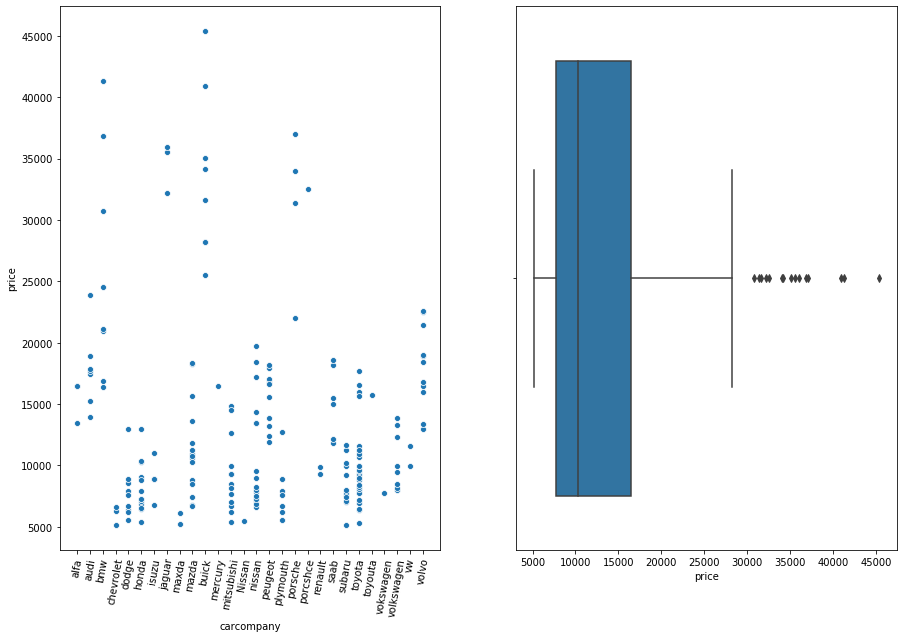

In [12]:
plt.figure(figsize=(15,10))
plt.subplot(121)
sns.scatterplot(x='carcompany',y='price',data=cars)
plt.xticks(rotation=80)
plt.subplot(122)
sns.boxplot(x='price',data=cars)
plt.show()

In [13]:
cg = cars.groupby(by='carcompany',axis=0)['price'].mean().sort_values(ascending=False)

In [14]:
cg = pd.DataFrame(cg.reset_index(inplace=False))

In [15]:
cg.describe()

,price
count,28.000000
mean,14654.491026
std,8902.650135
min,5499.000000
25%,8452.110577
50%,10746.191176
75%,16842.041679
max,34600.000000


### In the above analysis we grouped the cars by their companyname and calculated the Average price of car from that company so we will split data on basis of carcompany and their price range from 0 to 10K,10K to 20K,above 20K as lowrange,midrange,highrange.

In [16]:
def carrange(i):
    y = []
    for x in i:
       
        if x<10001 :
            y.append('lowrange')
        elif x>10000 and x<20001 :
            y.append('midrange')
        elif x>20000 :
            y.append('highrange')
    return y


In [17]:
cg['pricerange']= carrange(cg.price)

In [18]:
cars = pd.merge(how='outer',left=cars,right=cg,on='carcompany')

In [19]:
cars.head(20)

,symboling,CarName,fueltype,aspiration,doornumber,carbody,drivewheel,enginelocation,wheelbase,carlength,carwidth,carheight,curbweight,enginetype,cylindernumber,enginesize,fuelsystem,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price_x,carcompany,price_y,pricerange
0,3,alfa-romero giulia,gas,std,two,convertible,rwd,front,88.6,168.8,64.1,48.8,2548,dohc,four,130,mpfi,3.47,2.68,9.0,111,5000,21,27,13495.000,alfa,15498.333333,midrange
1,3,alfa-romero stelvio,gas,std,two,convertible,rwd,front,88.6,168.8,64.1,48.8,2548,dohc,four,130,mpfi,3.47,2.68,9.0,111,5000,21,27,16500.000,alfa,15498.333333,midrange
2,1,alfa-romero Quadrifoglio,gas,std,two,hatchback,rwd,front,94.5,171.2,65.5,52.4,2823,ohcv,six,152,mpfi,2.68,3.47,9.0,154,5000,19,26,16500.000,alfa,15498.333333,midrange
3,2,audi 100 ls,gas,std,four,sedan,fwd,front,99.8,176.6,66.2,54.3,2337,ohc,four,109,mpfi,3.19,3.40,10.0,102,5500,24,30,13950.000,audi,17859.166714,midrange
4,2,audi 100ls,gas,std,four,sedan,4wd,front,99.4,176.6,66.4,54.3,2824,ohc,five,136,mpfi,3.19,3.40,8.0,115,5500,18,22,17450.000,audi,17859.166714,midrange
5,2,audi fox,gas,std,two,sedan,fwd,front,99.8,177.3,66.3,53.1,2507,ohc,five,136,mpfi,3.19,3.40,8.5,110,5500,19,25,15250.000,audi,17859.166714,midrange
6,1,audi 100ls,gas,std,four,sedan,fwd,front,105.8,192.7,71.4,55.7,2844,ohc,five,136,mpfi,3.19,3.40,8.5,110,5500,19,25,17710.000,audi,17859.166714,midrange
7,1,audi 5000,gas,std,four,wagon,fwd,front,105.8,192.7,71.4,55.7,2954,ohc,five,136,mpfi,3.19,3.40,8.5,110,5500,19,25,18920.000,audi,17859.166714,midrange
8,1,audi 4000,gas,turbo,four,sedan,fwd,front,105.8,192.7,71.4,55.9,3086,ohc,five,131,mpfi,3.13,3.40,8.3,140,5500,17,20,23875.000,audi,17859.166714,midrange
9,0,audi 5000s (diesel),gas,turbo,two,hatchback,4wd,front,99.5,178.2,67.9,52.0,3053,ohc,five,131,mpfi,3.13,3.40,7.0,160,5500,16,22,17859.167,audi,17859.166714,midrange


### We dont require the following columns anymore as the required information is derived from those columns and saved in  seperate column.
### CarName
### carcompany
### price_y this is the Average price from cg dataframe where carcompanies were grouped and Average price was calculated.


In [20]:
cars.drop(columns=['CarName','carcompany','price_y'],inplace=True)

In [21]:
cars.head()

,symboling,fueltype,aspiration,doornumber,carbody,drivewheel,enginelocation,wheelbase,carlength,carwidth,carheight,curbweight,enginetype,cylindernumber,enginesize,fuelsystem,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price_x,pricerange
0,3,gas,std,two,convertible,rwd,front,88.6,168.8,64.1,48.8,2548,dohc,four,130,mpfi,3.47,2.68,9.0,111,5000,21,27,13495.0,midrange
1,3,gas,std,two,convertible,rwd,front,88.6,168.8,64.1,48.8,2548,dohc,four,130,mpfi,3.47,2.68,9.0,111,5000,21,27,16500.0,midrange
2,1,gas,std,two,hatchback,rwd,front,94.5,171.2,65.5,52.4,2823,ohcv,six,152,mpfi,2.68,3.47,9.0,154,5000,19,26,16500.0,midrange
3,2,gas,std,four,sedan,fwd,front,99.8,176.6,66.2,54.3,2337,ohc,four,109,mpfi,3.19,3.40,10.0,102,5500,24,30,13950.0,midrange
4,2,gas,std,four,sedan,4wd,front,99.4,176.6,66.4,54.3,2824,ohc,five,136,mpfi,3.19,3.40,8.0,115,5500,18,22,17450.0,midrange


In [22]:
cars.rename(columns={'price_x':'price'},inplace=True)

In [23]:
cars.head()

,symboling,fueltype,aspiration,doornumber,carbody,drivewheel,enginelocation,wheelbase,carlength,carwidth,carheight,curbweight,enginetype,cylindernumber,enginesize,fuelsystem,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price,pricerange
0,3,gas,std,two,convertible,rwd,front,88.6,168.8,64.1,48.8,2548,dohc,four,130,mpfi,3.47,2.68,9.0,111,5000,21,27,13495.0,midrange
1,3,gas,std,two,convertible,rwd,front,88.6,168.8,64.1,48.8,2548,dohc,four,130,mpfi,3.47,2.68,9.0,111,5000,21,27,16500.0,midrange
2,1,gas,std,two,hatchback,rwd,front,94.5,171.2,65.5,52.4,2823,ohcv,six,152,mpfi,2.68,3.47,9.0,154,5000,19,26,16500.0,midrange
3,2,gas,std,four,sedan,fwd,front,99.8,176.6,66.2,54.3,2337,ohc,four,109,mpfi,3.19,3.40,10.0,102,5500,24,30,13950.0,midrange
4,2,gas,std,four,sedan,4wd,front,99.4,176.6,66.4,54.3,2824,ohc,five,136,mpfi,3.19,3.40,8.0,115,5500,18,22,17450.0,midrange


In [24]:
cars.shape

(205, 25)

In [25]:
cars.dtypes

symboling             int64
fueltype             object
aspiration           object
doornumber           object
carbody              object
drivewheel           object
enginelocation       object
wheelbase           float64
carlength           float64
carwidth            float64
carheight           float64
curbweight            int64
enginetype           object
cylindernumber       object
enginesize            int64
fuelsystem           object
boreratio           float64
stroke              float64
compressionratio    float64
horsepower            int64
peakrpm               int64
citympg               int64
highwaympg            int64
price               float64
pricerange           object
dtype: object

### categorical columns have data type object so lets filter those columns using our own function

In [26]:
def datatype(dataframe,dtype):
    x = dataframe.columns
    y=[]
    for i in x: 
        if dataframe[i].dtype == dtype:
            y.append(i)
        
        else:
            continue
    return y    
car1 = datatype(cars,'object')

cars[car1].dtypes

fueltype          object
aspiration        object
doornumber        object
carbody           object
drivewheel        object
enginelocation    object
enginetype        object
cylindernumber    object
fuelsystem        object
pricerange        object
dtype: object

In [27]:


def fun(dataframe):
    col = list(dataframe.columns)
    mydict = {}
    for i in col:
        mydict[i] = dataframe[i].unique()
    print(mydict)     
fun(cars[car1])

{'fueltype': array(['gas', 'diesel'], dtype=object), 'aspiration': array(['std', 'turbo'], dtype=object), 'doornumber': array(['two', 'four'], dtype=object), 'carbody': array(['convertible', 'hatchback', 'sedan', 'wagon', 'hardtop'],
      dtype=object), 'drivewheel': array(['rwd', 'fwd', '4wd'], dtype=object), 'enginelocation': array(['front', 'rear'], dtype=object), 'enginetype': array(['dohc', 'ohcv', 'ohc', 'l', 'rotor', 'ohcf', 'dohcv'], dtype=object), 'cylindernumber': array(['four', 'six', 'five', 'three', 'twelve', 'two', 'eight'],
      dtype=object), 'fuelsystem': array(['mpfi', '2bbl', 'mfi', '1bbl', 'spfi', '4bbl', 'idi', 'spdi'],
      dtype=object), 'pricerange': array(['midrange', 'highrange', 'lowrange'], dtype=object)}


In [28]:
cars[car1].nunique()

fueltype          2
aspiration        2
doornumber        2
carbody           5
drivewheel        3
enginelocation    2
enginetype        7
cylindernumber    7
fuelsystem        8
pricerange        3
dtype: int64

In [29]:
for x in cars[car1]:
    print(x,end=' ')
    print(cars[x].dtype,end=' ')
    print(cars[x].nunique(),end='\n')

fueltype object 2
aspiration object 2
doornumber object 2
carbody object 5
drivewheel object 3
enginelocation object 2
enginetype object 7
cylindernumber object 7
fuelsystem object 8
pricerange object 3


<Figure size 1080x720 with 0 Axes>

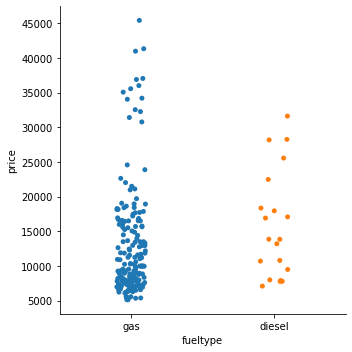

In [30]:
plt.figure(figsize=(15,10))
sns.catplot(y='price',x='fueltype', data=cars)
plt.show()

In [31]:
def cat_plot(x,y,data):
    plt.figure(figsize=(20,25))
    for var in x:
        plt.subplot(3,4,x.index(var)+1)
        sns.boxplot(y=y,x=var, data=data)
        plt.xticks(rotation=70,labels=None)
        plt.title(var)
    plt.show()
          

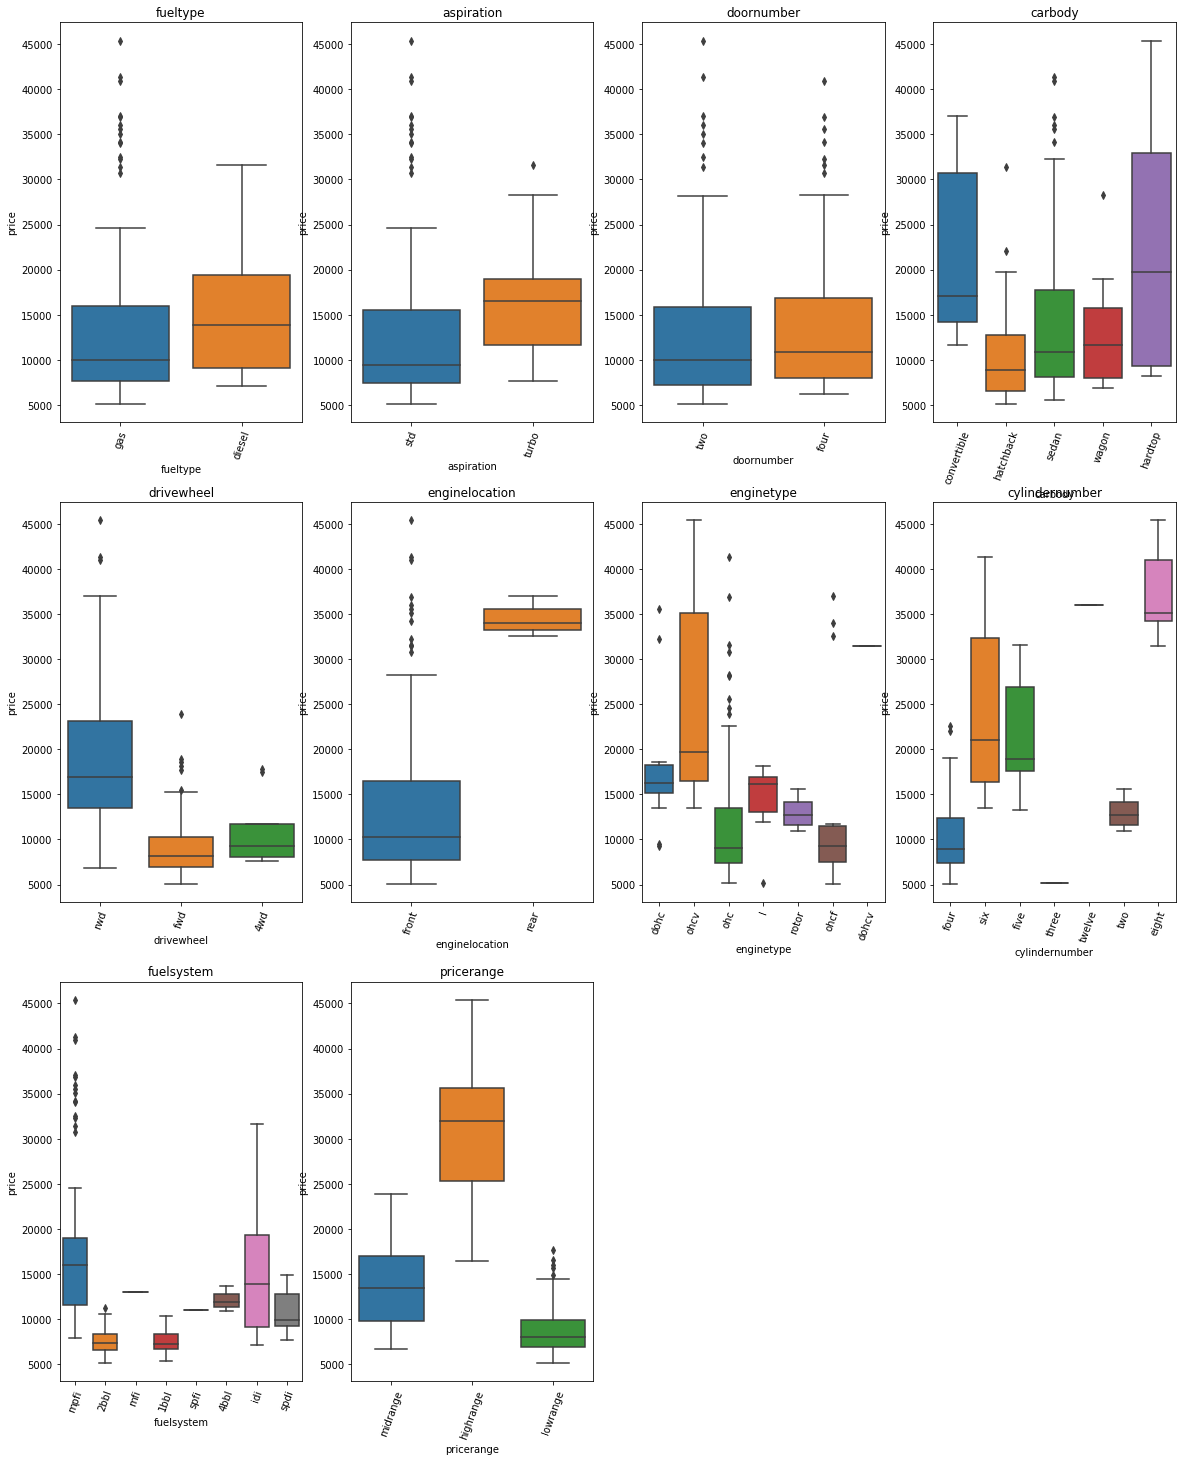

In [32]:
cat_plot(x=car1,y='price',data=cars)

From the above boxplots we see that CarBody,enginetype,engine location,cylinder number,pricerange have higher variation with respect to price.

In [33]:
cars.shape

(205, 25)

In [34]:
c = pd.get_dummies(cars['fueltype'],drop_first=False)
c.head()
c.drop(columns='gas',inplace=True)
c.tail()

,diesel
200,0
201,0
202,0
203,1
204,0


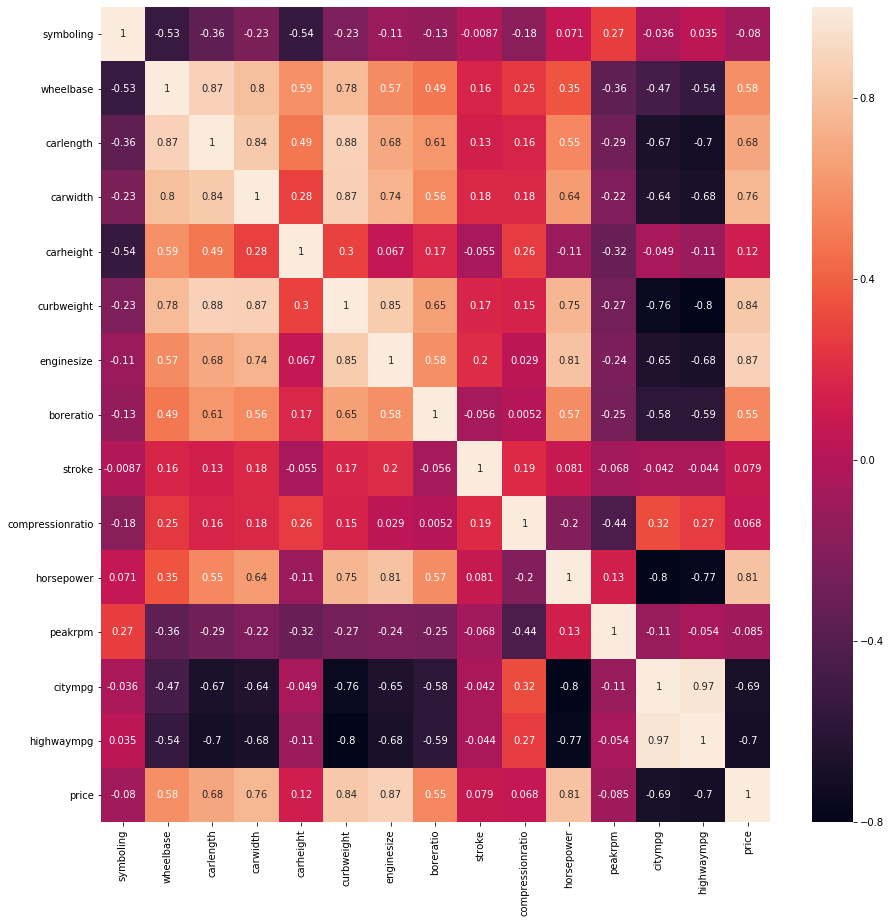

In [35]:
plt.figure(figsize=(15,15))
ax = sns.heatmap(data = cars.corr(),annot=True)
top, bottom = ax.get_ylim()
ax.set_ylim(top+0.5, bottom-0.5)
plt.show()

### From the above heatmap it is observed that Enginesize has highest positive correlation with Price followed by curbweight,carwidth,carlength,wheelbase.
### Price has highest negative correlation with Highwaympg and citympg.

<Figure size 1080x1080 with 0 Axes>

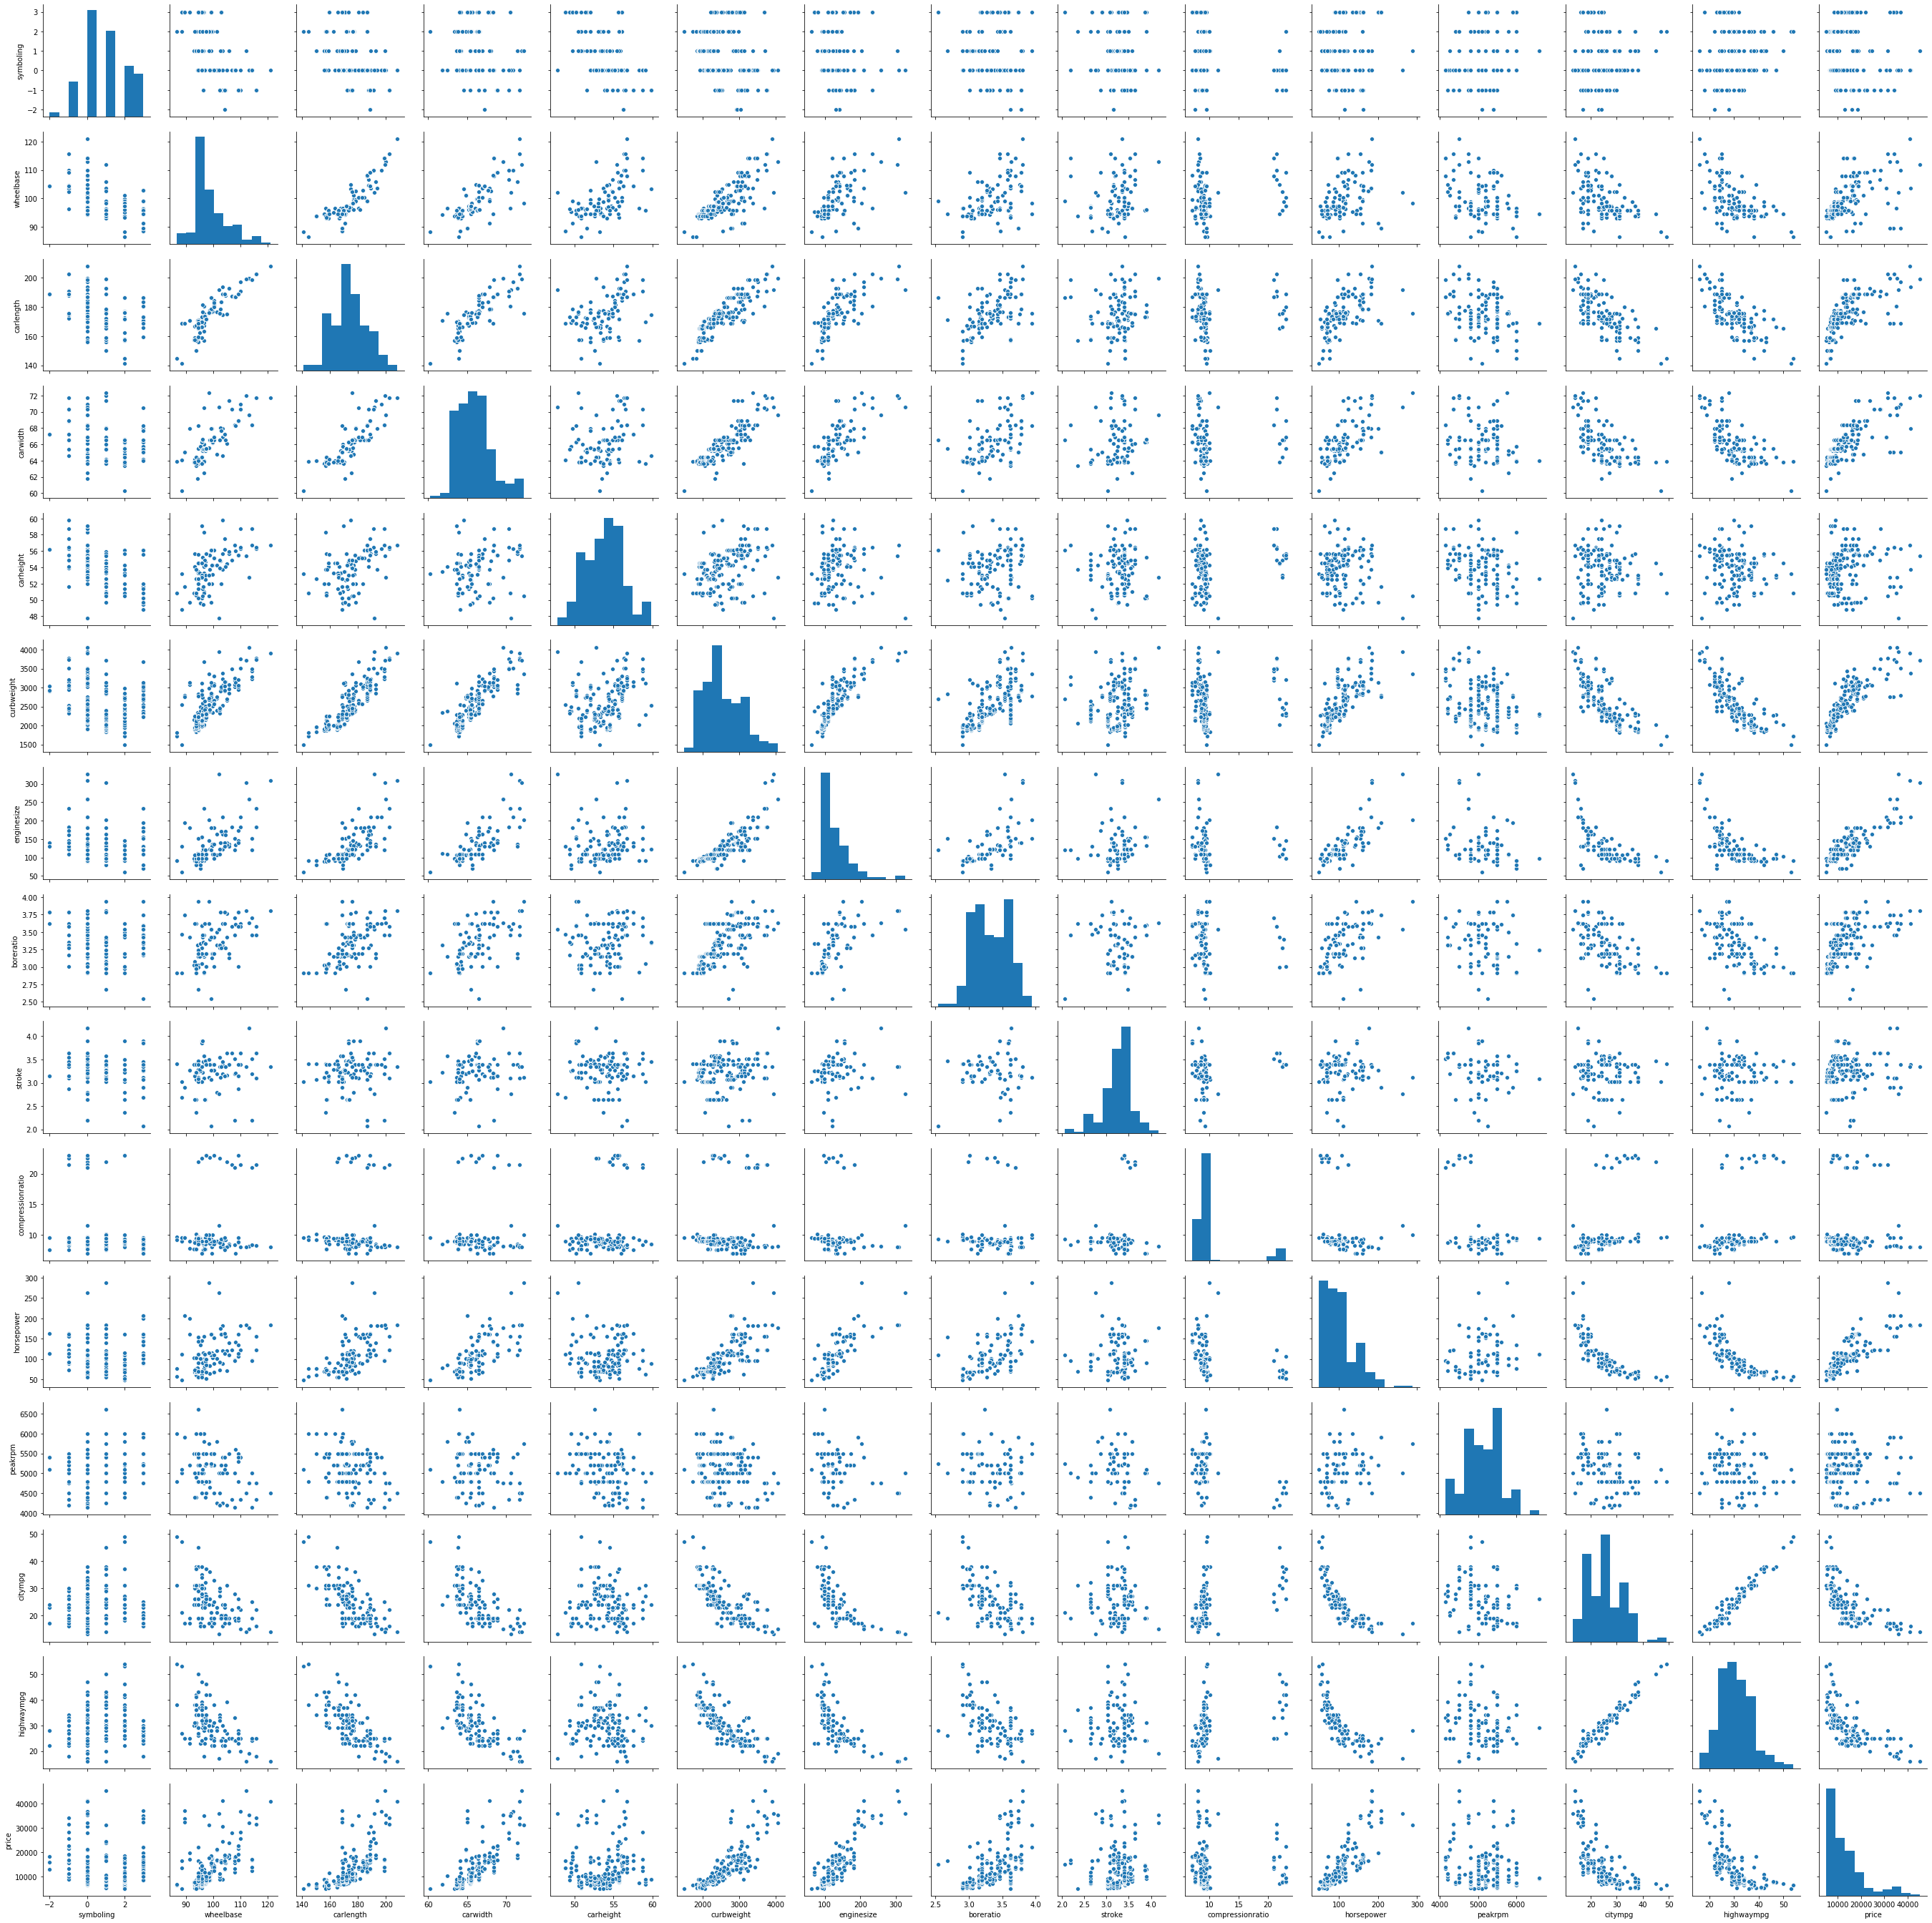

In [36]:
plt.figure(figsize=(15,15))
#sns.pairplot(data=cars,x_vars=cars[cars.columns !='price'],y_vars='price')
sns.pairplot(cars)
plt.show()

In [37]:

carn = cars.columns.where(~cars.columns.isin(car1))

In [38]:
type(carn)

pandas.core.indexes.base.Index

In [39]:
carn = cars[list(carn.dropna(how='all'))]

In [40]:
#carn.head()
carn

,symboling,wheelbase,carlength,carwidth,carheight,curbweight,enginesize,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price
0,3,88.6,168.8,64.1,48.8,2548,130,3.47,2.68,9.0,111,5000,21,27,13495.0
1,3,88.6,168.8,64.1,48.8,2548,130,3.47,2.68,9.0,111,5000,21,27,16500.0
2,1,94.5,171.2,65.5,52.4,2823,152,2.68,3.47,9.0,154,5000,19,26,16500.0
3,2,99.8,176.6,66.2,54.3,2337,109,3.19,3.40,10.0,102,5500,24,30,13950.0
4,2,99.4,176.6,66.4,54.3,2824,136,3.19,3.40,8.0,115,5500,18,22,17450.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
200,-1,109.1,188.8,68.9,55.5,2952,141,3.78,3.15,9.5,114,5400,23,28,16845.0
201,-1,109.1,188.8,68.8,55.5,3049,141,3.78,3.15,8.7,160,5300,19,25,19045.0
202,-1,109.1,188.8,68.9,55.5,3012,173,3.58,2.87,8.8,134,5500,18,23,21485.0
203,-1,109.1,188.8,68.9,55.5,3217,145,3.01,3.40,23.0,106,4800,26,27,22470.0


In [41]:

carn = list(set(list(cars.columns)) - set(car1))

In [42]:
cars[carn]

,enginesize,boreratio,highwaympg,symboling,wheelbase,carwidth,carlength,citympg,curbweight,peakrpm,compressionratio,price,carheight,stroke,horsepower
0,130,3.47,27,3,88.6,64.1,168.8,21,2548,5000,9.0,13495.0,48.8,2.68,111
1,130,3.47,27,3,88.6,64.1,168.8,21,2548,5000,9.0,16500.0,48.8,2.68,111
2,152,2.68,26,1,94.5,65.5,171.2,19,2823,5000,9.0,16500.0,52.4,3.47,154
3,109,3.19,30,2,99.8,66.2,176.6,24,2337,5500,10.0,13950.0,54.3,3.40,102
4,136,3.19,22,2,99.4,66.4,176.6,18,2824,5500,8.0,17450.0,54.3,3.40,115
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
200,141,3.78,28,-1,109.1,68.9,188.8,23,2952,5400,9.5,16845.0,55.5,3.15,114
201,141,3.78,25,-1,109.1,68.8,188.8,19,3049,5300,8.7,19045.0,55.5,3.15,160
202,173,3.58,23,-1,109.1,68.9,188.8,18,3012,5500,8.8,21485.0,55.5,2.87,134
203,145,3.01,27,-1,109.1,68.9,188.8,26,3217,4800,23.0,22470.0,55.5,3.40,106


<Figure size 2160x2160 with 0 Axes>

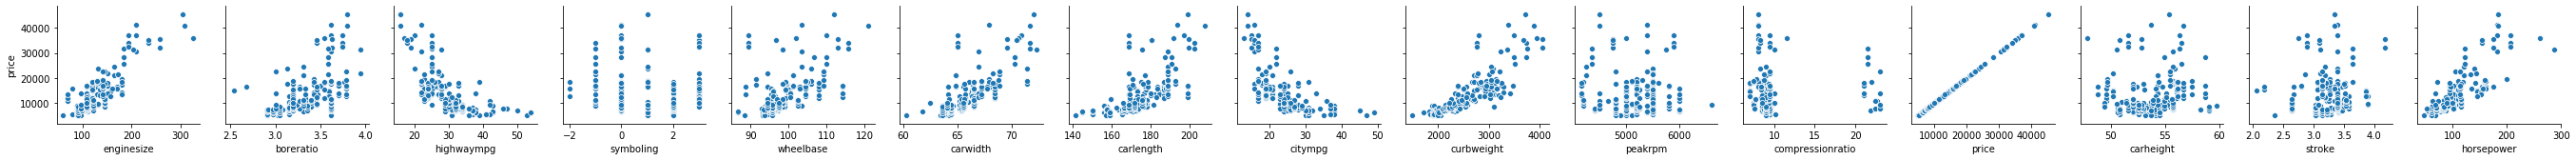

In [43]:
plt.figure(figsize=(30,30))
#sns.pairplot(data=cars,x_vars=cars[cars.columns !='price'],y_vars='price')
sns.pairplot(cars,x_vars=carn,y_vars='price')
plt.show()

<Figure size 2160x2160 with 0 Axes>

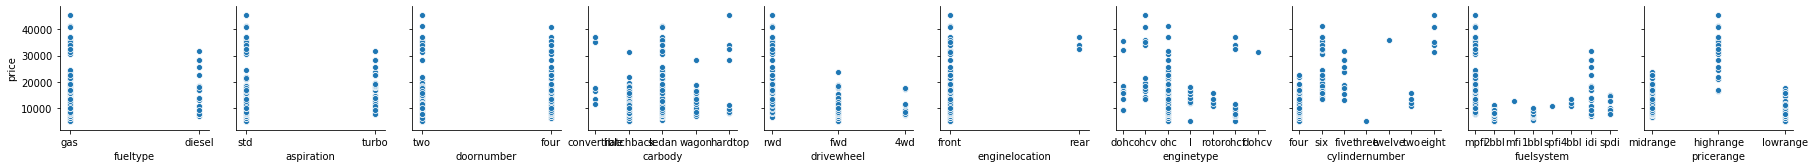

In [44]:
plt.figure(figsize=(30,30))

sns.pairplot(cars,x_vars=car1,y_vars='price')
plt.show()

### We have classified Carcompany in 3 different Price range in order of lowrange,midrange,highrange. so lets group them in 0,1,2 categorical order 

In [45]:
def prange(X):
    l1=[]
    for i in X:
        if (i=='lowrange'):
            l1.append(0)
        elif (i=='midrange'):
            l1.append(1)
        elif (i=='highrange'):
            l1.append(2)
    return l1        
        
        

In [46]:
cars['pricerange'] = prange(cars['pricerange'])

In [47]:
cars.pricerange.dtype

dtype('int64')

<Figure size 2160x2160 with 0 Axes>

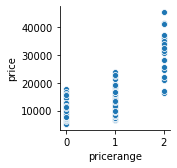

In [48]:
plt.figure(figsize=(30,30))

sns.pairplot(cars,x_vars='pricerange',y_vars='price')
plt.show()

In [49]:
status =  pd.get_dummies(cars,drop_first=True)
status.head()

,symboling,wheelbase,carlength,carwidth,carheight,curbweight,enginesize,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price,pricerange,fueltype_gas,aspiration_turbo,doornumber_two,carbody_hardtop,carbody_hatchback,carbody_sedan,carbody_wagon,drivewheel_fwd,drivewheel_rwd,enginelocation_rear,enginetype_dohcv,enginetype_l,enginetype_ohc,enginetype_ohcf,enginetype_ohcv,enginetype_rotor,cylindernumber_five,cylindernumber_four,cylindernumber_six,cylindernumber_three,cylindernumber_twelve,cylindernumber_two,fuelsystem_2bbl,fuelsystem_4bbl,fuelsystem_idi,fuelsystem_mfi,fuelsystem_mpfi,fuelsystem_spdi,fuelsystem_spfi
0,3,88.6,168.8,64.1,48.8,2548,130,3.47,2.68,9.0,111,5000,21,27,13495.0,1,1,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0
1,3,88.6,168.8,64.1,48.8,2548,130,3.47,2.68,9.0,111,5000,21,27,16500.0,1,1,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0
2,1,94.5,171.2,65.5,52.4,2823,152,2.68,3.47,9.0,154,5000,19,26,16500.0,1,1,0,1,0,1,0,0,0,1,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,1,0,0
3,2,99.8,176.6,66.2,54.3,2337,109,3.19,3.40,10.0,102,5500,24,30,13950.0,1,1,0,0,0,0,1,0,1,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0
4,2,99.4,176.6,66.4,54.3,2824,136,3.19,3.40,8.0,115,5500,18,22,17450.0,1,1,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0


In [50]:
status.shape

(205, 45)

In [51]:
df_train,df_test = train_test_split(status,train_size=0.7, random_state=100)

In [52]:
scaler = MinMaxScaler()

In [53]:
col = list(df_train.columns)

In [54]:
df_train[col] = scaler.fit_transform(df_train[col])

In [55]:
df_train.head()

,symboling,wheelbase,carlength,carwidth,carheight,curbweight,enginesize,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price,pricerange,fueltype_gas,aspiration_turbo,doornumber_two,carbody_hardtop,carbody_hatchback,carbody_sedan,carbody_wagon,drivewheel_fwd,drivewheel_rwd,enginelocation_rear,enginetype_dohcv,enginetype_l,enginetype_ohc,enginetype_ohcf,enginetype_ohcv,enginetype_rotor,cylindernumber_five,cylindernumber_four,cylindernumber_six,cylindernumber_three,cylindernumber_twelve,cylindernumber_two,fuelsystem_2bbl,fuelsystem_4bbl,fuelsystem_idi,fuelsystem_mfi,fuelsystem_mpfi,fuelsystem_spdi,fuelsystem_spfi
122,0.6,0.244828,0.426016,0.307018,0.265487,0.272692,0.139623,0.230159,0.525253,0.15000,0.093458,0.551020,0.500000,0.567568,0.068818,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
125,1.0,0.272414,0.452033,0.701754,0.212389,0.500388,0.339623,1.000000,0.464646,0.15625,0.443925,0.551020,0.166667,0.270270,0.466890,1.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
166,0.6,0.272414,0.448780,0.324561,0.424779,0.314973,0.139623,0.444444,0.449495,0.15000,0.299065,1.000000,0.361111,0.324324,0.122110,0.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
1,1.0,0.068966,0.450407,0.333333,0.088496,0.411171,0.260377,0.626984,0.247475,0.12500,0.294393,0.346939,0.222222,0.270270,0.314446,0.5,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
199,0.2,0.610345,0.775610,0.605263,0.858407,0.647401,0.260377,0.746032,0.484848,0.03125,0.532710,0.387755,0.111111,0.135135,0.382131,0.5,1.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0


### Dividing Df_train into X and Y sets for the model building

In [56]:
y_train = pd.DataFrame(df_train.pop('price'))
X_train = df_train

In [57]:
X_train.head()

,symboling,wheelbase,carlength,carwidth,carheight,curbweight,enginesize,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,pricerange,fueltype_gas,aspiration_turbo,doornumber_two,carbody_hardtop,carbody_hatchback,carbody_sedan,carbody_wagon,drivewheel_fwd,drivewheel_rwd,enginelocation_rear,enginetype_dohcv,enginetype_l,enginetype_ohc,enginetype_ohcf,enginetype_ohcv,enginetype_rotor,cylindernumber_five,cylindernumber_four,cylindernumber_six,cylindernumber_three,cylindernumber_twelve,cylindernumber_two,fuelsystem_2bbl,fuelsystem_4bbl,fuelsystem_idi,fuelsystem_mfi,fuelsystem_mpfi,fuelsystem_spdi,fuelsystem_spfi
122,0.6,0.244828,0.426016,0.307018,0.265487,0.272692,0.139623,0.230159,0.525253,0.15000,0.093458,0.551020,0.500000,0.567568,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
125,1.0,0.272414,0.452033,0.701754,0.212389,0.500388,0.339623,1.000000,0.464646,0.15625,0.443925,0.551020,0.166667,0.270270,1.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
166,0.6,0.272414,0.448780,0.324561,0.424779,0.314973,0.139623,0.444444,0.449495,0.15000,0.299065,1.000000,0.361111,0.324324,0.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
1,1.0,0.068966,0.450407,0.333333,0.088496,0.411171,0.260377,0.626984,0.247475,0.12500,0.294393,0.346939,0.222222,0.270270,0.5,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
199,0.2,0.610345,0.775610,0.605263,0.858407,0.647401,0.260377,0.746032,0.484848,0.03125,0.532710,0.387755,0.111111,0.135135,0.5,1.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0


In [58]:
y_train.head()

,price
122,0.068818
125,0.466890
166,0.122110
1,0.314446
199,0.382131


# Building our Model

### Using RFE for Feature elimination

In [59]:
lm = LinearRegression()
lm.fit(X_train, y_train)

rfe = RFE(lm, 20)             # running RFE
rfe = rfe.fit(X_train, y_train)

In [60]:
list(zip(X_train.columns,rfe.support_,rfe.ranking_))

[('symboling', False, 21),
 ('wheelbase', True, 1),
 ('carlength', True, 1),
 ('carwidth', True, 1),
 ('carheight', False, 12),
 ('curbweight', True, 1),
 ('enginesize', True, 1),
 ('boreratio', True, 1),
 ('stroke', True, 1),
 ('compressionratio', False, 15),
 ('horsepower', True, 1),
 ('peakrpm', True, 1),
 ('citympg', False, 8),
 ('highwaympg', False, 7),
 ('pricerange', True, 1),
 ('fueltype_gas', False, 11),
 ('aspiration_turbo', False, 9),
 ('doornumber_two', False, 22),
 ('carbody_hardtop', False, 2),
 ('carbody_hatchback', False, 3),
 ('carbody_sedan', False, 5),
 ('carbody_wagon', False, 4),
 ('drivewheel_fwd', False, 10),
 ('drivewheel_rwd', False, 20),
 ('enginelocation_rear', True, 1),
 ('enginetype_dohcv', False, 23),
 ('enginetype_l', False, 16),
 ('enginetype_ohc', True, 1),
 ('enginetype_ohcf', True, 1),
 ('enginetype_ohcv', True, 1),
 ('enginetype_rotor', True, 1),
 ('cylindernumber_five', False, 13),
 ('cylindernumber_four', True, 1),
 ('cylindernumber_six', False, 14

In [61]:
col = X_train.columns[rfe.support_]
col

Index(['wheelbase', 'carlength', 'carwidth', 'curbweight', 'enginesize',
       'boreratio', 'stroke', 'horsepower', 'peakrpm', 'pricerange',
       'enginelocation_rear', 'enginetype_ohc', 'enginetype_ohcf',
       'enginetype_ohcv', 'enginetype_rotor', 'cylindernumber_four',
       'cylindernumber_three', 'cylindernumber_twelve', 'cylindernumber_two',
       'fuelsystem_idi'],
      dtype='object')

In [62]:
X_train.columns[~rfe.support_]

Index(['symboling', 'carheight', 'compressionratio', 'citympg', 'highwaympg',
       'fueltype_gas', 'aspiration_turbo', 'doornumber_two', 'carbody_hardtop',
       'carbody_hatchback', 'carbody_sedan', 'carbody_wagon', 'drivewheel_fwd',
       'drivewheel_rwd', 'enginetype_dohcv', 'enginetype_l',
       'cylindernumber_five', 'cylindernumber_six', 'fuelsystem_2bbl',
       'fuelsystem_4bbl', 'fuelsystem_mfi', 'fuelsystem_mpfi',
       'fuelsystem_spdi', 'fuelsystem_spfi'],
      dtype='object')

In [63]:
X_train_rfe = X_train[col]

In [64]:
X_train_rfe = sm.add_constant(X_train_rfe)

In [65]:
lm = sm.OLS(y_train,X_train_rfe).fit()   

In [66]:
print(lm.summary())

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.951
Model:                            OLS   Adj. R-squared:                  0.943
Method:                 Least Squares   F-statistic:                     124.7
Date:                Sat, 30 May 2020   Prob (F-statistic):           7.01e-71
Time:                        02:47:41   Log-Likelihood:                 230.65
No. Observations:                 143   AIC:                            -421.3
Df Residuals:                     123   BIC:                            -362.0
Df Model:                          19                                         
Covariance Type:            nonrobust                                         
                            coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------
const                    -0.20

In [67]:
X_train_new = X_train_rfe.drop(["wheelbase"], axis = 1)

In [68]:
X_train_lm = sm.add_constant(X_train_new)
lm = sm.OLS(y_train,X_train_lm).fit() 
print(lm.summary())

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.950
Model:                            OLS   Adj. R-squared:                  0.943
Method:                 Least Squares   F-statistic:                     131.4
Date:                Sat, 30 May 2020   Prob (F-statistic):           1.08e-71
Time:                        02:47:46   Log-Likelihood:                 229.97
No. Observations:                 143   AIC:                            -421.9
Df Residuals:                     124   BIC:                            -365.6
Df Model:                          18                                         
Covariance Type:            nonrobust                                         
                            coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------
const                    -0.20

In [69]:
X_train_new = X_train_rfe.drop(['const','wheelbase'], axis=1)

In [70]:
vif = pd.DataFrame()
X = X_train_new
vif['Features'] = X.columns
vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
17,cylindernumber_two,inf
13,enginetype_rotor,inf
2,curbweight,79.98
3,enginesize,75.84
0,carlength,57.24
1,carwidth,48.22
5,stroke,46.02
4,boreratio,45.27
6,horsepower,28.81
14,cylindernumber_four,19.39


In [71]:
X_train_new = X_train_new.drop(['cylindernumber_two'], axis=1)

In [72]:
vif = pd.DataFrame()
X = X_train_new
vif['Features'] = X.columns
vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
2,curbweight,79.98
3,enginesize,75.84
0,carlength,57.24
1,carwidth,48.22
5,stroke,46.02
4,boreratio,45.27
6,horsepower,28.81
14,cylindernumber_four,19.39
7,peakrpm,10.53
10,enginetype_ohc,8.81


In [73]:
X_train_lm = sm.add_constant(X_train_new)
lm1 = sm.OLS(y_train,X_train_lm).fit() 
print(lm1.summary())

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.950
Model:                            OLS   Adj. R-squared:                  0.943
Method:                 Least Squares   F-statistic:                     131.4
Date:                Sat, 30 May 2020   Prob (F-statistic):           1.08e-71
Time:                        02:47:53   Log-Likelihood:                 229.97
No. Observations:                 143   AIC:                            -421.9
Df Residuals:                     124   BIC:                            -365.6
Df Model:                          18                                         
Covariance Type:            nonrobust                                         
                            coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------
const                    -0.20

### observing VIF above and stats summary lets drop carlength since it has high p value and high VIF both

In [74]:
X_train_new = X_train_new.drop(['carlength'], axis=1)

In [75]:
vif = pd.DataFrame()
X = X_train_new
vif['Features'] = X.columns
vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
2,enginesize,73.62
1,curbweight,57.78
4,stroke,45.32
3,boreratio,43.08
0,carwidth,40.24
5,horsepower,27.88
13,cylindernumber_four,19.38
6,peakrpm,10.52
9,enginetype_ohc,8.81
7,pricerange,5.27


In [76]:
X_train_lm = sm.add_constant(X_train_new)
lm2 = sm.OLS(y_train,X_train_lm).fit() 
print(lm2.summary())

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.949
Model:                            OLS   Adj. R-squared:                  0.942
Method:                 Least Squares   F-statistic:                     136.6
Date:                Sat, 30 May 2020   Prob (F-statistic):           4.32e-72
Time:                        02:48:04   Log-Likelihood:                 228.16
No. Observations:                 143   AIC:                            -420.3
Df Residuals:                     125   BIC:                            -367.0
Df Model:                          17                                         
Covariance Type:            nonrobust                                         
                            coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------
const                    -0.23

### lets drop engine size it has high VIF and standard error

In [77]:
X_train_new = X_train_new.drop(['enginesize'], axis=1)

In [78]:
vif = pd.DataFrame()
X = X_train_new
vif['Features'] = X.columns
vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
1,curbweight,49.19
0,carwidth,39.81
2,boreratio,33.80
4,horsepower,27.43
3,stroke,25.28
12,cylindernumber_four,14.28
5,peakrpm,10.11
8,enginetype_ohc,8.67
6,pricerange,4.87
9,enginetype_ohcf,2.76


In [79]:
X_train_lm = sm.add_constant(X_train_new)
lm3 = sm.OLS(y_train,X_train_lm).fit() 
print(lm3.summary())

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.908
Model:                            OLS   Adj. R-squared:                  0.896
Method:                 Least Squares   F-statistic:                     77.38
Date:                Sat, 30 May 2020   Prob (F-statistic):           4.15e-57
Time:                        02:48:19   Log-Likelihood:                 185.81
No. Observations:                 143   AIC:                            -337.6
Df Residuals:                     126   BIC:                            -287.2
Df Model:                          16                                         
Covariance Type:            nonrobust                                         
                            coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------
const                    -0.11

This Dropped our accuracy and r squared

Peak RPM has high VIF and high P value

In [80]:
X_train_new = X_train_new.drop(['peakrpm'], axis=1)

In [81]:
vif = pd.DataFrame()
X = X_train_new
vif['Features'] = X.columns
vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
1,curbweight,47.56
0,carwidth,36.98
2,boreratio,29.75
3,stroke,25.25
4,horsepower,22.14
11,cylindernumber_four,10.53
7,enginetype_ohc,8.49
5,pricerange,4.84
8,enginetype_ohcf,2.73
14,fuelsystem_idi,2.04


In [82]:
X_train_lm = sm.add_constant(X_train_new)
lm4 = sm.OLS(y_train,X_train_lm).fit() 
print(lm4.summary())

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.908
Model:                            OLS   Adj. R-squared:                  0.897
Method:                 Least Squares   F-statistic:                     83.13
Date:                Sat, 30 May 2020   Prob (F-statistic):           4.66e-58
Time:                        02:48:31   Log-Likelihood:                 185.76
No. Observations:                 143   AIC:                            -339.5
Df Residuals:                     127   BIC:                            -292.1
Df Model:                          15                                         
Covariance Type:            nonrobust                                         
                            coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------
const                    -0.11

Bore ratio has high VIF and P value

In [83]:
X_train_new = X_train_new.drop(['boreratio'], axis=1)

vif = pd.DataFrame()
X = X_train_new
vif['Features'] = X.columns
vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
1,curbweight,42.54
0,carwidth,36.59
2,stroke,24.28
3,horsepower,20.45
6,enginetype_ohc,8.47
10,cylindernumber_four,6.06
4,pricerange,4.45
7,enginetype_ohcf,2.10
13,fuelsystem_idi,2.03
5,enginelocation_rear,1.94


In [84]:
X_train_lm = sm.add_constant(X_train_new)
lm5 = sm.OLS(y_train,X_train_lm).fit() 
print(lm5.summary())

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.907
Model:                            OLS   Adj. R-squared:                  0.896
Method:                 Least Squares   F-statistic:                     88.85
Date:                Sat, 30 May 2020   Prob (F-statistic):           8.68e-59
Time:                        02:48:50   Log-Likelihood:                 185.09
No. Observations:                 143   AIC:                            -340.2
Df Residuals:                     128   BIC:                            -295.7
Df Model:                          14                                         
Covariance Type:            nonrobust                                         
                            coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------
const                    -0.10

In [85]:
X_train_new1 = X_train_new.drop(['curbweight'], axis=1)

vif = pd.DataFrame()
X = X_train_new1
vif['Features'] = X.columns
vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
1,stroke,24.02
0,carwidth,21.62
2,horsepower,15.10
5,enginetype_ohc,7.65
9,cylindernumber_four,6.00
3,pricerange,4.19
6,enginetype_ohcf,2.09
4,enginelocation_rear,1.85
12,fuelsystem_idi,1.85
7,enginetype_ohcv,1.68


In [86]:
X_train_lm = sm.add_constant(X_train_new1)
lm5 = sm.OLS(y_train,X_train_lm).fit() 
print(lm5.summary())

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.893
Model:                            OLS   Adj. R-squared:                  0.882
Method:                 Least Squares   F-statistic:                     82.67
Date:                Sat, 30 May 2020   Prob (F-statistic):           6.07e-56
Time:                        02:49:10   Log-Likelihood:                 175.18
No. Observations:                 143   AIC:                            -322.4
Df Residuals:                     129   BIC:                            -280.9
Df Model:                          13                                         
Covariance Type:            nonrobust                                         
                            coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------
const                    -0.06

### Lets add enginesize

In [87]:
X_train_new1 = pd.concat([X_train_rfe['enginesize'],X_train_new1],axis=1)

In [88]:
#X_train_new1 = X_train_new1.drop(['enginesize'], axis=1)

vif = pd.DataFrame()
X = X_train_new1
vif['Features'] = X.columns
vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif


,Features,VIF
0,enginesize,37.98
2,stroke,33.06
1,carwidth,23.99
3,horsepower,18.76
6,enginetype_ohc,8.39
10,cylindernumber_four,6.65
4,pricerange,5.14
9,enginetype_rotor,2.34
7,enginetype_ohcf,2.21
5,enginelocation_rear,1.85


In [89]:
X_train_lm = sm.add_constant(X_train_new1)
lm6 = sm.OLS(y_train,X_train_lm).fit() 
print(lm6.summary())

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.928
Model:                            OLS   Adj. R-squared:                  0.920
Method:                 Least Squares   F-statistic:                     117.9
Date:                Sat, 30 May 2020   Prob (F-statistic):           6.19e-66
Time:                        02:49:36   Log-Likelihood:                 203.63
No. Observations:                 143   AIC:                            -377.3
Df Residuals:                     128   BIC:                            -332.8
Df Model:                          14                                         
Covariance Type:            nonrobust                                         
                            coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------
const                    -0.09

In [90]:
X_train_new2 = X_train_new1.drop(['cylindernumber_four'], axis=1)

vif = pd.DataFrame()
X = X_train_new2
vif['Features'] = X.columns
vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
0,enginesize,34.23
2,stroke,25.28
1,carwidth,22.47
3,horsepower,18.46
6,enginetype_ohc,8.28
4,pricerange,5.14
9,enginetype_rotor,2.08
5,enginelocation_rear,1.85
12,fuelsystem_idi,1.81
8,enginetype_ohcv,1.76


In [91]:
X_train_lm = sm.add_constant(X_train_new2)
lm7 = sm.OLS(y_train,X_train_lm).fit() 
print(lm7.summary())

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.928
Model:                            OLS   Adj. R-squared:                  0.920
Method:                 Least Squares   F-statistic:                     127.2
Date:                Sat, 30 May 2020   Prob (F-statistic):           7.56e-67
Time:                        02:50:25   Log-Likelihood:                 203.25
No. Observations:                 143   AIC:                            -378.5
Df Residuals:                     129   BIC:                            -337.0
Df Model:                          13                                         
Covariance Type:            nonrobust                                         
                            coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------
const                    -0.12

In [92]:
X_train_new3 = X_train_new1.drop(['enginetype_ohcf'], axis=1)

vif = pd.DataFrame()
X = X_train_new3
vif['Features'] = X.columns
vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
0,enginesize,35.96
2,stroke,28.56
1,carwidth,22.89
3,horsepower,18.74
6,enginetype_ohc,8.21
9,cylindernumber_four,5.03
4,pricerange,4.74
8,enginetype_rotor,2.26
12,fuelsystem_idi,1.84
11,cylindernumber_twelve,1.78


In [93]:
X_train_lm = sm.add_constant(X_train_new3)
lm8 = sm.OLS(y_train,X_train_lm).fit() 
print(lm8.summary())

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.928
Model:                            OLS   Adj. R-squared:                  0.920
Method:                 Least Squares   F-statistic:                     127.4
Date:                Sat, 30 May 2020   Prob (F-statistic):           6.68e-67
Time:                        02:50:47   Log-Likelihood:                 203.38
No. Observations:                 143   AIC:                            -378.8
Df Residuals:                     129   BIC:                            -337.3
Df Model:                          13                                         
Covariance Type:            nonrobust                                         
                            coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------
const                    -0.11

In [94]:
vif = pd.DataFrame()
X = X_train_lm
vif['Features'] = X.columns
vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
0,const,55.10
1,enginesize,10.83
4,horsepower,6.25
2,carwidth,3.41
10,cylindernumber_four,3.41
7,enginetype_ohc,2.88
9,enginetype_rotor,2.74
5,pricerange,2.55
3,stroke,2.33
12,cylindernumber_twelve,1.86


# Residual Analysis Of Train data

In [95]:
y_train_pred = pd.DataFrame(lm8.predict(X_train_lm))

In [96]:
y_train_pred.rename(columns={0:'price'},inplace=True)

In [97]:
#y_train
y_train_pred

,price
122,0.029072
125,0.528679
166,0.025421
1,0.247713
199,0.400915
...,...
87,0.133223
103,0.365431
67,0.642012
24,0.002774


In [98]:
y_train

,price
122,0.068818
125,0.466890
166,0.122110
1,0.314446
199,0.382131
...,...
87,0.114954
103,0.231539
67,0.564522
24,0.030693


In [99]:
y_train - y_train_pred

,price
122,0.039746
125,-0.061790
166,0.096689
1,0.066733
199,-0.018784
...,...
87,-0.018269
103,-0.133893
67,-0.077490
24,0.027920


## Residual Analysis of Error

Text(0.5, 0, 'Errors')

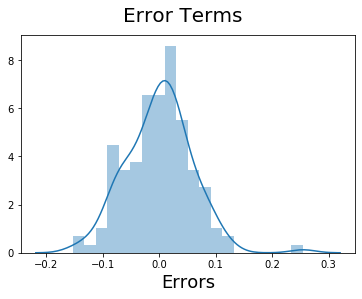

In [100]:
fig = plt.figure()
sns.distplot((y_train - y_train_pred), bins = 20)
fig.suptitle('Error Terms', fontsize = 20)                  # Plot heading 
plt.xlabel('Errors', fontsize = 18) 

In [101]:
col = list(df_test.columns)

In [102]:
col

['symboling',
 'wheelbase',
 'carlength',
 'carwidth',
 'carheight',
 'curbweight',
 'enginesize',
 'boreratio',
 'stroke',
 'compressionratio',
 'horsepower',
 'peakrpm',
 'citympg',
 'highwaympg',
 'price',
 'pricerange',
 'fueltype_gas',
 'aspiration_turbo',
 'doornumber_two',
 'carbody_hardtop',
 'carbody_hatchback',
 'carbody_sedan',
 'carbody_wagon',
 'drivewheel_fwd',
 'drivewheel_rwd',
 'enginelocation_rear',
 'enginetype_dohcv',
 'enginetype_l',
 'enginetype_ohc',
 'enginetype_ohcf',
 'enginetype_ohcv',
 'enginetype_rotor',
 'cylindernumber_five',
 'cylindernumber_four',
 'cylindernumber_six',
 'cylindernumber_three',
 'cylindernumber_twelve',
 'cylindernumber_two',
 'fuelsystem_2bbl',
 'fuelsystem_4bbl',
 'fuelsystem_idi',
 'fuelsystem_mfi',
 'fuelsystem_mpfi',
 'fuelsystem_spdi',
 'fuelsystem_spfi']

In [103]:
df_test.shape

(62, 45)

In [104]:
df_test[col].shape

(62, 45)

In [105]:
df_test[col] = scaler.transform(df_test[col])

In [106]:
len(col)

45

In [107]:
y_test = pd.DataFrame(df_test.pop('price'))
X_test = df_test

In [108]:
X_test

,symboling,wheelbase,carlength,carwidth,carheight,curbweight,enginesize,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,pricerange,fueltype_gas,aspiration_turbo,doornumber_two,carbody_hardtop,carbody_hatchback,carbody_sedan,carbody_wagon,drivewheel_fwd,drivewheel_rwd,enginelocation_rear,enginetype_dohcv,enginetype_l,enginetype_ohc,enginetype_ohcf,enginetype_ohcv,enginetype_rotor,cylindernumber_five,cylindernumber_four,cylindernumber_six,cylindernumber_three,cylindernumber_twelve,cylindernumber_two,fuelsystem_2bbl,fuelsystem_4bbl,fuelsystem_idi,fuelsystem_mfi,fuelsystem_mpfi,fuelsystem_spdi,fuelsystem_spfi
160,0.4,0.313793,0.409756,0.359649,0.460177,0.235066,0.139623,0.404762,0.424242,0.12500,0.102804,0.265306,0.694444,0.810811,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
186,0.8,0.368966,0.497561,0.456140,0.699115,0.305275,0.181132,0.404762,0.611111,0.12500,0.172897,0.448980,0.388889,0.459459,0.5,1.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
59,0.6,0.420690,0.596748,0.543860,0.522124,0.347944,0.230189,0.563492,0.606061,0.10000,0.168224,0.265306,0.361111,0.405405,0.5,1.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
165,0.6,0.272414,0.448780,0.324561,0.424779,0.301396,0.139623,0.444444,0.449495,0.15000,0.299065,1.000000,0.361111,0.324324,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
140,0.8,0.231034,0.263415,0.307018,0.699115,0.291699,0.177358,0.746032,0.227273,0.10625,0.116822,0.102041,0.361111,0.378378,0.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
28,0.2,0.575862,0.544715,0.377193,1.061947,0.406129,0.230189,0.523810,0.641414,0.09375,0.186916,0.346939,0.305556,0.351351,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
29,1.0,0.320690,0.521951,0.526316,0.212389,0.513189,0.358491,0.730159,0.863636,0.00000,0.453271,0.346939,0.166667,0.189189,0.0,1.0,1.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
182,0.8,0.368966,0.497561,0.456140,0.699115,0.299845,0.135849,0.261905,0.611111,1.00000,0.018692,0.265306,0.666667,0.783784,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
40,0.4,0.341379,0.557724,0.192982,0.557522,0.342901,0.184906,0.373016,0.702020,0.12500,0.177570,0.673469,0.388889,0.432432,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


# Making Predictions

In [109]:
X_test_new = X_test[X_train_new3.columns]

# Adding a constant variable 
X_test_new = sm.add_constant(X_test_new)

In [110]:
y_test_pred = lm8.predict(X_test_new)

In [121]:
y_test_pred

,price
160,0.070981
186,0.156365
59,0.217143
165,0.025421
140,0.061312
...,...
28,0.118397
29,0.279835
182,0.067450
40,0.021252


In [122]:
y_test_pred = pd.DataFrame(y_test_pred)
y_test_pred.rename(columns={0:'price'},inplace=True)

Text(0, 0.5, 'y_test_pred')

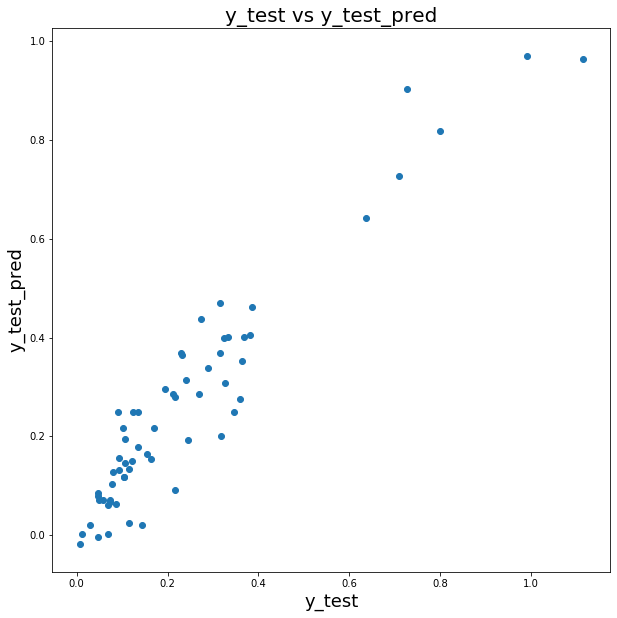

In [123]:
plt.figure(figsize=(10,10))
plt.scatter(y_test,y_test_pred)
plt.title('y_test vs y_test_pred', fontsize=20)
plt.xlabel('y_test', fontsize=18)                          # X-label
plt.ylabel('y_test_pred', fontsize=18)                          # Y-label

In [126]:
from sklearn.metrics import mean_squared_error,r2_score
mse = mean_squared_error(y_test,y_test_pred)
rsquared = r2_score(y_test,y_test_pred)

In [127]:
mse

0.005912271827660653

In [128]:
rsquared

0.8848279246662755